In [64]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2, PIL, random, csv, json, math

def create_label_pool(img_gold):
    img_pool = []
    label_pool = []
    img_gold = np.array(Image.open("./DATASET/picture.png"))
    if (img_gold.shape[2] ==4): img_gold = img_gold[:,:,:3]
    csv_file = open('./DATASET/label.csv', mode='r')
    csv_reader = csv.DictReader(csv_file)
    totalrows = sum(1 for _ in open('./DATASET/label.csv'))
    
    line_count = 0
    mult = 1.2
    for row in csv_reader:
        line_count += 1
        data = json.loads(row["region_shape_attributes"])
        
        try:
            if (data["name"] == "rect"):
                small = img_gold[data["y"]:(data["y"]+data["height"]), data["x"]:(data["x"]+data["width"])]
                img_pool.append(small)
                label_pool.append(data["type"])

            if (data["name"] == "polygon"):
                polygon = []
                for j in range(len(data["all_points_x"])):
                    polygon.append([data["all_points_x"][j], data["all_points_y"][j]])
                # Cắt ra hình chữ nhật tối thiểu bao quanh 
                rect = cv2.minAreaRect(np.array([polygon]))
                box = np.int0(cv2.boxPoints(rect))
                W = rect[1][0]
                H = rect[1][1]
                Xs = [i[0] for i in box]
                Ys = [i[1] for i in box]
                x1 = min(Xs)
                x2 = max(Xs)
                y1 = min(Ys)
                y2 = max(Ys)
                rotated = False
                angle = rect[2]
                if angle < -45:
                    angle+=90
                    rotated = True
                croppedW = W if not rotated else H 
                croppedH = H if not rotated else W
                center = (int((x1+x2)/2), int((y1+y2)/2))
                size = (int(mult*(x2-x1)),int(mult*(y2-y1)))
                M = cv2.getRotationMatrix2D((size[0]/2, size[1]/2), angle, 1.0)

                cropped = cv2.warpAffine(cv2.getRectSubPix(img_gold, size, center), M, size)
                small = cv2.getRectSubPix(cropped, (int(croppedW*mult), int(croppedH*mult)), (size[0]/2, size[1]/2))
        
                img_pool.append(small)
                label_pool.append(data["type"])
            except:
                print("------------ Có lỗi!!")
    print('Done ', line_count, ' lines!') 
    return label_pool

In [54]:
import os
import glob

if not os.path.exists("./train"): os.makedirs("./train")
if not os.path.exists("./train/images"): os.makedirs("./train/images")
if not os.path.exists("./train/labels"): os.makedirs("./train/labels")
if not os.path.exists("./valid"): os.makedirs("./valid")
if not os.path.exists("./valid/images"): os.makedirs("./valid/images")
if not os.path.exists("./valid/labels"): os.makedirs("./valid/labels")
if not os.path.exists("./test"): os.makedirs("./test")
if not os.path.exists("./test/images"): os.makedirs("./test/images")
    
size = [1200, 1200]
TRAIN_NUM = 2
VAL_NUM = 5

In [73]:
import random
print(random.randint(0, 1))

0


0
(49, 21, 3)
(24, 50, 3)
(19, 33, 3)
(22, 52, 3)
(25, 63, 3)
(38, 168, 3)
(28, 145, 3)
(20, 100, 3)
(54, 24, 3)
(22, 51, 3)
(25, 99, 3)
(21, 84, 3)
(25, 97, 3)
(25, 79, 3)
(17, 42, 3)
(56, 168, 3)
(43, 255, 3)
(40, 234, 3)
(31, 154, 3)
(24, 139, 3)
(18, 32, 3)
(18, 35, 3)
(62, 399, 3)
(27, 49, 3)
(26, 42, 3)
(39, 73, 3)


/home/techpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


(70, 30, 3)
(30, 49, 3)
(24, 75, 3)
(22, 56, 3)
(23, 46, 3)
(28, 76, 3)
(38, 21, 3)
(28, 17, 3)
(22, 34, 3)
(12, 24, 3)
(15, 42, 3)
(49, 21, 3)
(24, 50, 3)
(19, 33, 3)
(22, 52, 3)
(25, 63, 3)
(38, 168, 3)
(28, 145, 3)
(20, 100, 3)
(54, 24, 3)
(22, 51, 3)
(25, 99, 3)
(21, 84, 3)
(25, 97, 3)
(25, 79, 3)
(17, 42, 3)
(56, 168, 3)
(43, 255, 3)
(40, 234, 3)
(31, 154, 3)
(24, 139, 3)
(18, 32, 3)
(18, 35, 3)
(62, 399, 3)
(27, 49, 3)
(26, 42, 3)
(39, 73, 3)
(70, 30, 3)
(30, 49, 3)
(24, 75, 3)
(22, 56, 3)
(23, 46, 3)
(28, 76, 3)
(38, 21, 3)
(28, 17, 3)
(22, 34, 3)
(12, 24, 3)
(15, 42, 3)


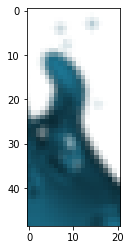

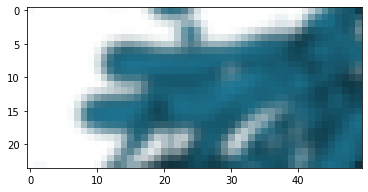

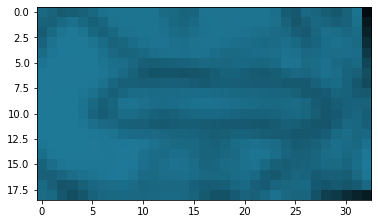

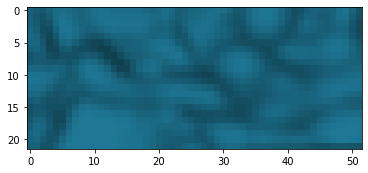

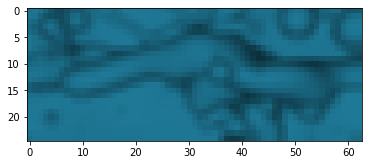

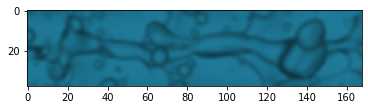

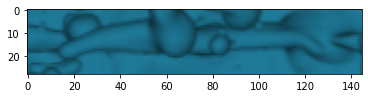

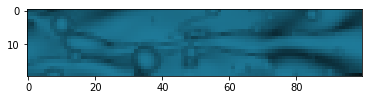

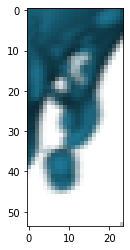

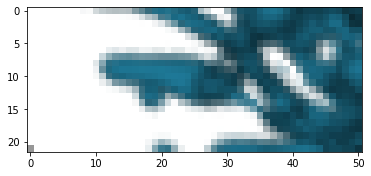

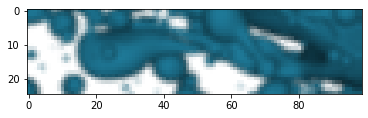

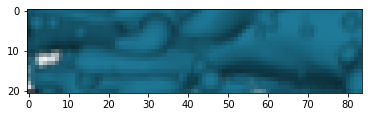

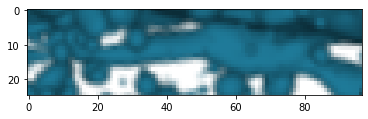

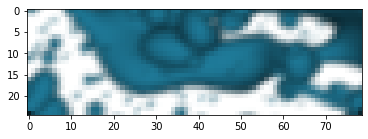

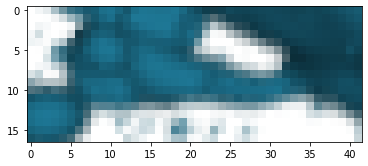

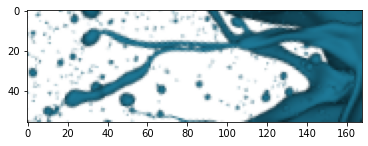

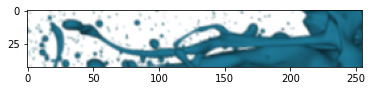

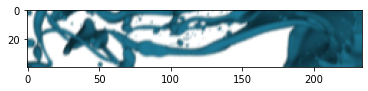

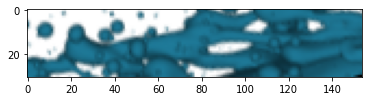

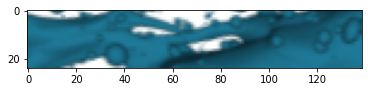

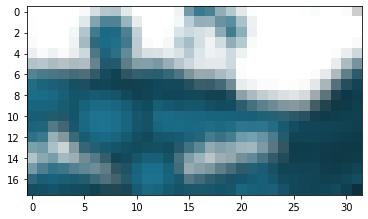

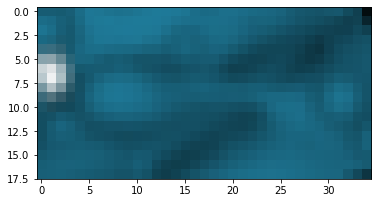

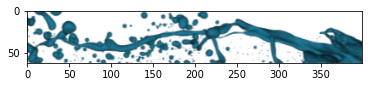

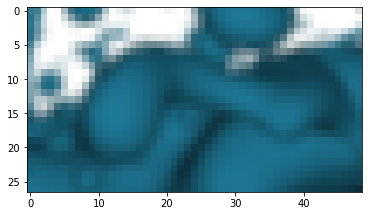

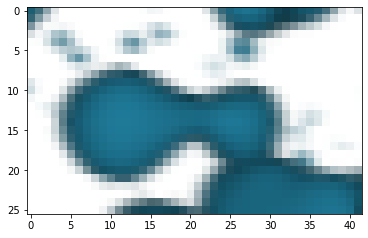

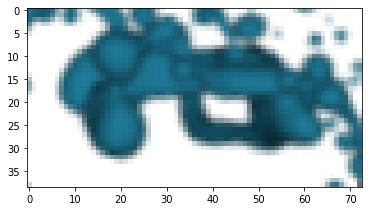

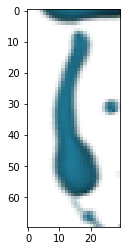

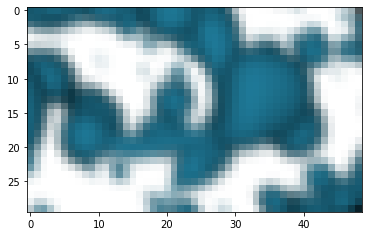

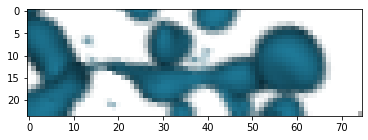

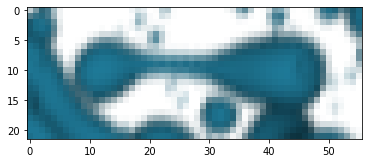

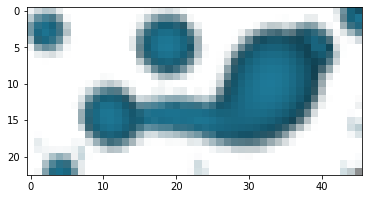

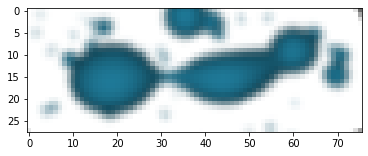

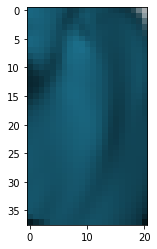

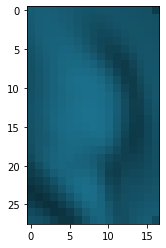

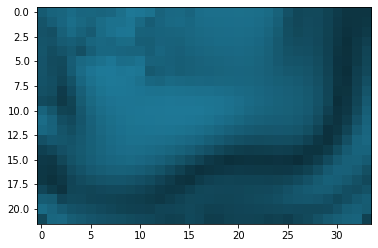

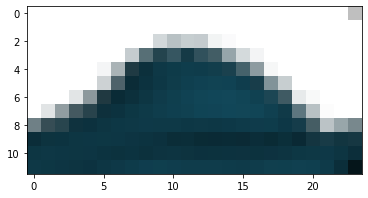

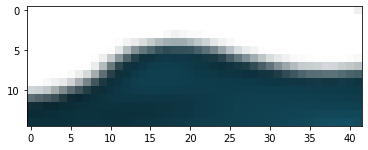

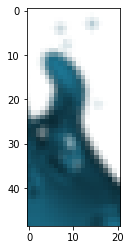

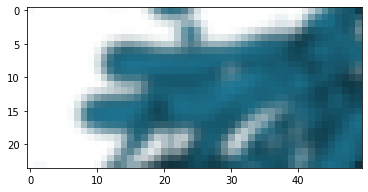

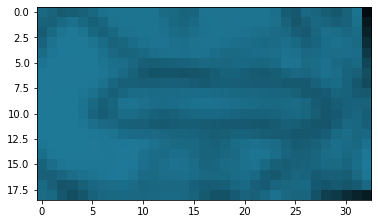

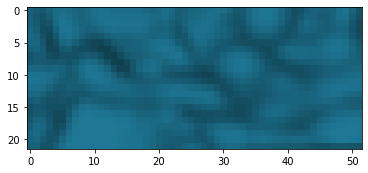

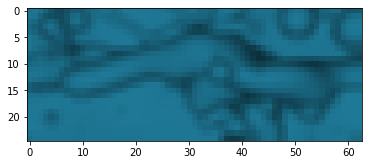

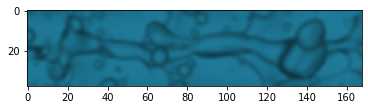

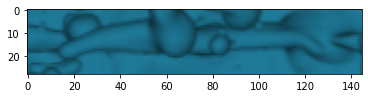

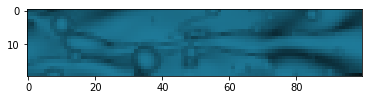

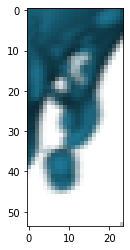

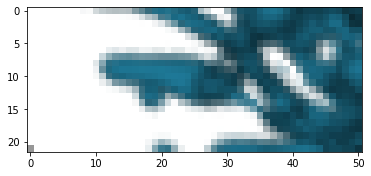

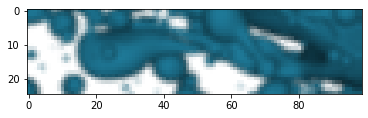

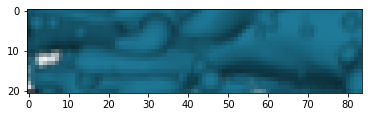

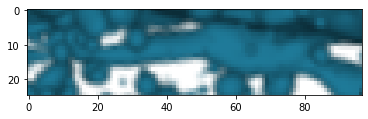

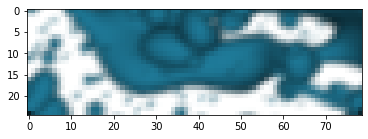

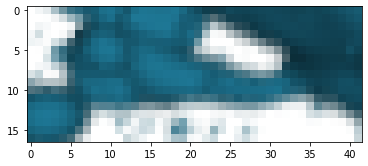

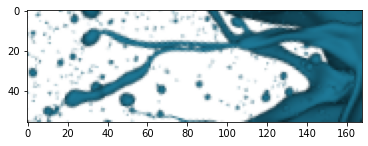

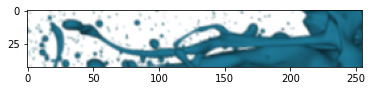

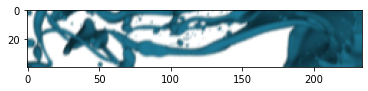

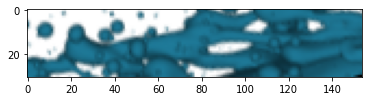

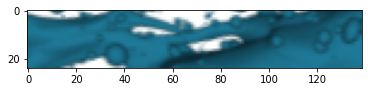

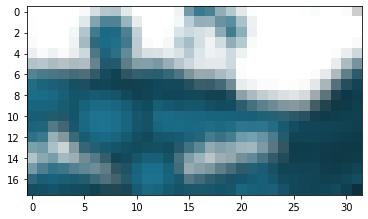

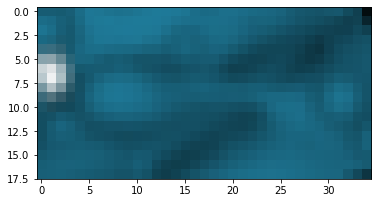

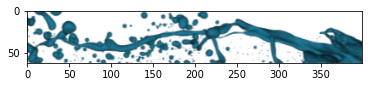

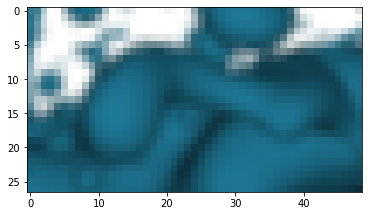

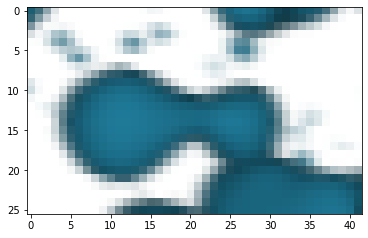

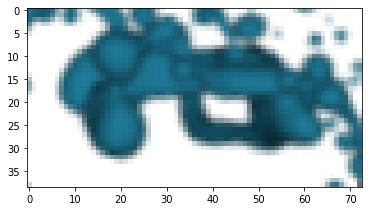

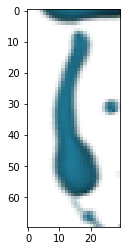

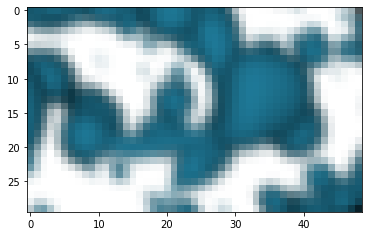

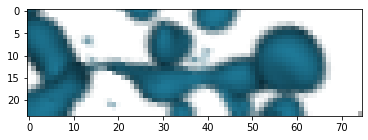

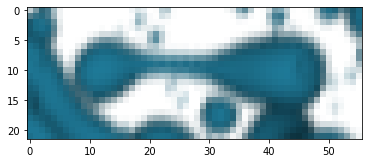

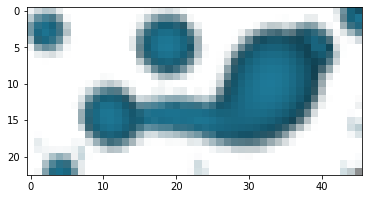

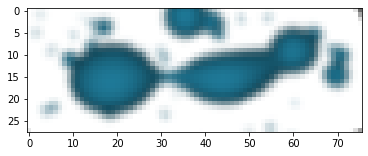

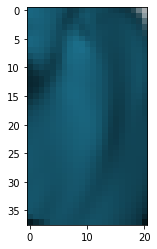

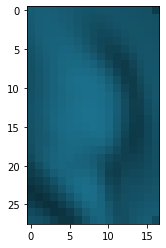

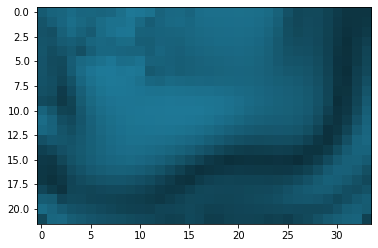

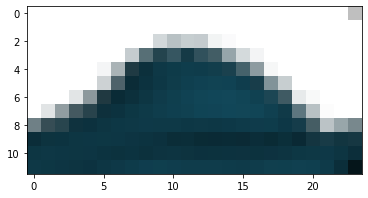

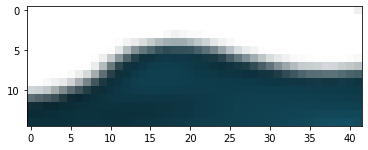

In [65]:
for count in range(0, TRAIN_NUM):
    if count % 10 == 0: print(count)
    output_name = 'train/images/'+str(count)+'.png'
    label_name = 'train/labels/'+str(count)+'.txt'
    
    label_img = create_label_pool(img_gold)
#     test_img = generate_new_image_error(img_gold_list[img_idx], label_img, img_unmount_list[img_idx])
    
# #     Image.fromarray(img_gold_list[img_idx]).save("./full/ref/"+str(count)+".png")
# #     Image.fromarray(test_img).save("./full/test/"+str(count)+".png")
# #     Image.fromarray(label_img).save("./full/label/"+str(count)+".png")
        
#     Image.fromarray(img_gold_list[img_idx][y:y+small_size, x:x+small_size]).resize((image_size, image_size), PIL.Image.ANTIALIAS).save(reference_name)
#     Image.fromarray(test_img[y:y+small_size, x:x+small_size]).resize((image_size, image_size), PIL.Image.ANTIALIAS).save(test_name)
#     Image.fromarray(label_img[y:y+small_size, x:x+small_size]).resize((image_size, image_size), PIL.Image.ANTIALIAS).save(label_name)    

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

for i in range(0, 5):
    print(i)
    fig=plt.figure(figsize=(16, 16))
    fig.add_subplot(1, 3, 1)
    plt.imshow(Image.open('./train_data_2/reference/'+str(i)+'.png'))
    plt.title('Test')
    fig.add_subplot(1, 3, 2)
    plt.imshow(Image.open('./train_data_2/test/'+str(i)+'.png'))
    plt.title('Reference')
    fig.add_subplot(1, 3, 3)
    plt.imshow(Image.open('./train_data_2/label/'+str(i)+'.png'))
    plt.title('Label')
    plt.show()